In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import re
df_raw = pd.read_csv('data.csv', encoding='latin-1')
df_raw

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
df_raw.HS.value_counts()

HS
0    7608
1    5561
Name: count, dtype: int64

In [3]:
df_raw.Abusive.value_counts()

Abusive
0    8126
1    5043
Name: count, dtype: int64

In [104]:
clr_text = df_raw.drop_duplicates('Tweet')
clr_text.head(4)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
clr_text.HS.value_counts()

HS
0    7522
1    5501
Name: count, dtype: int64

In [106]:
clr_text.Abusive.value_counts()

Abusive
0    8031
1    4992
Name: count, dtype: int64

In [8]:
print("Toxic Shape: ", clr_text[(clr_text['HS'] == 1) | clr_text['Abusive'] == 1].shape)
print("Non-toxic shape: ", clr_text[(clr_text['HS'] == 0) & (clr_text['Abusive'] == 0)].shape)

Toxic Shape:  (7243, 13)
Non-toxic shape:  (5780, 13)


In [11]:
import numpy as np
conditions = [(clr_text['HS_Weak'] == 1),(clr_text['HS_Moderate'] == 1),(clr_text['HS_Strong'] == 1)]

values = ['weak','moderate','strong']
clr_text['level'] = np.select(conditions,values)
clr_text.sample(5)

C:\Users\susic\AppData\Local\Temp\ipykernel_21400\3126183954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr_text['level'] = np.select(conditions,values)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,level
5608,"USER Pemikiran busuk itu membunuh biasa, sekar...",1,1,1,0,0,0,1,0,0,1,0,0,weak
8536,Pergi mampus sana',1,1,1,0,0,0,0,0,1,1,0,0,weak
4279,Ya. Bagiku ketika aku melihat seseorang mabuk ...,0,1,0,0,0,0,0,0,0,0,0,0,0
6485,USER USER USER USER USER Bubarkan dpr ?,1,0,0,1,0,0,0,0,1,0,0,1,strong
1803,USER USER ya iyalah.. Minions kan gak main di ...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
import numpy as np
condition2 = [(clr_text['HS'] == 1),(clr_text['Abusive'] == 1)]

values2 = ['hating','kasar']
clr_text['tweet_type'] = np.select(condition2,values2)
clr_text.sample(5)

C:\Users\susic\AppData\Local\Temp\ipykernel_21400\2313991715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr_text['tweet_type'] = np.select(condition2,values2)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_type
10800,USER Indahnya cocot...',0,1,0,0,0,0,0,0,0,0,0,0,kasar
6722,"USER Contohnya, kalau kita lihat, bayi yg baru...",0,0,0,0,0,0,0,0,0,0,0,0,0
3998,USER josss gandoskui memek nya',0,1,0,0,0,0,0,0,0,0,0,0,kasar
11671,Pertanyaan : kenapa di Pilkada Jatim tidak ada...,0,0,0,0,0,0,0,0,0,0,0,0,0
4195,"Bentar kak,saya nanya dl sama pemuka agama kri...",0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
#data['tweet_type'] = np.where((data['HS'] == 1) & (data['Abusive'] == 1), 'both', data['tweet_type'])
clr_text['tweet_type'] = np.where((clr_text['HS'] == 0) & (clr_text['Abusive'] == 0), 'non_toxic', clr_text['tweet_type'])
clr_text.sample(5)

C:\Users\susic\AppData\Local\Temp\ipykernel_21400\3357453290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr_text['tweet_type'] = np.where((clr_text['HS'] == 0) & (clr_text['Abusive'] == 0), 'non_toxic', clr_text['tweet_type'])


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_type
7284,"Bandara Kertajati, Salah Satu Bukti Sayang Pre...",0,0,0,0,0,0,0,0,0,0,0,0,non_toxic
10517,Setelah itu wanti wanti ke semua orang pakai n...,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic
4427,USER Tolol lu njink',1,1,1,0,0,0,0,0,1,1,0,0,hating
822,untung2an dan jangan sampai kami ngaku Komunis...,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic
11096,"USER heh kontol, jan sok pemes lu di rp, muka ...",1,1,1,0,1,0,1,1,0,1,0,0,hating


In [21]:
print(f"data abusive dan hs: ", clr_text[(clr_text['HS'] == 1) & clr_text['Abusive'] == 1].shape)
print(f"data HS", clr_text[(clr_text['HS']==1)].shape)
print(f"data abusive",clr_text[(clr_text['Abusive']==1)].shape)
print(f"Non-toxic: ", clr_text[(clr_text['HS'] == 0) & (clr_text['Abusive'] == 0)].shape)

data abusive dan hs:  (3250, 15)
data HS (5501, 15)
data abusive (4992, 15)
Non-toxic:  (5780, 15)


<Axes: xlabel='tweet_type'>

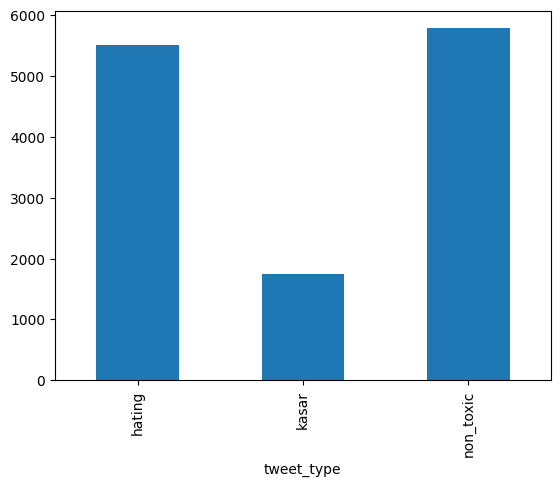

In [22]:
clr_text.groupby('tweet_type').tweet_type.count().plot(kind = 'bar')

In [23]:
#import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(clr_text['Tweet'])
wrd = WordCloud().generate(text)

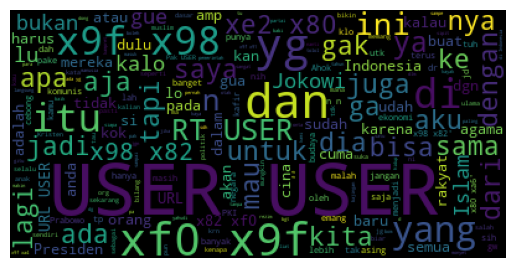

In [24]:
#generate plot
plt.imshow(wrd)
plt.axis("off")
plt.show()

In [114]:
clr_text['num_karakter'] = clr_text['Tweet'].str.len()
clr_text.head(3)

C:\Users\susic\AppData\Local\Temp\ipykernel_21400\795361777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr_text['num_karakter'] = clr_text['Tweet'].str.len()


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_type,num_kata,num_karakter
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,hating,25,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,kasar,21,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,non_toxic,37,254


In [116]:
j0 = clr_text['num_kata'].min()
j0

1

In [117]:
j100 = clr_text['num_kata'].max()
j100

52

In [119]:
range_total_kata = j100-j0
range_total_kata

51

In [113]:
clr_text['num_kata'] = clr_text['Tweet'].apply(lambda x: len(x.split(' ')))
clr_text.head()

C:\Users\susic\AppData\Local\Temp\ipykernel_21400\4263975057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clr_text['num_kata'] = clr_text['Tweet'].apply(lambda x: len(x.split(' ')))


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet_type,num_kata
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,hating,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,kasar,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,non_toxic,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,non_toxic,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,hating,14


In [28]:
clr_text['num_karakter'].sum()

1486059

In [29]:
clr_text['num_kata'].sum()

224771

In [30]:
clr_text['num_kata'].mean()

17.259540812408815

In [31]:
clr_text['num_kata'].mode()

0    11
Name: num_kata, dtype: int64

In [32]:
clr_text['num_kata'].median()

15.0

In [33]:
clr_text['num_karakter'].mean()

114.11034323888505

In [34]:
clr_text['num_karakter'].mode()

0    254
Name: num_karakter, dtype: int64

In [35]:
clr_text['num_karakter'].median()

100.0

In [70]:
#hasil nilai variance
import numpy as np
clr_text['num_karakter'].var()

4777.122134600348

In [120]:
import numpy as np
clr_text['num_kata'].var()

104.94660974151883

In [71]:
#hasil nilai variance
import numpy as np
clr_text['num_karakter'].std()

69.11672832679761

In [75]:
clr_text['num_karakter'].skew()


0.6933472961311485

In [76]:
clr_text['num_kata'].skew()

0.7902697544885797

In [77]:
clr_text['num_karakter'].kurtosis()

-0.40339646945389607

In [78]:
clr_text['num_kata'].kurtosis()

-0.1516782156422587

<Axes: >

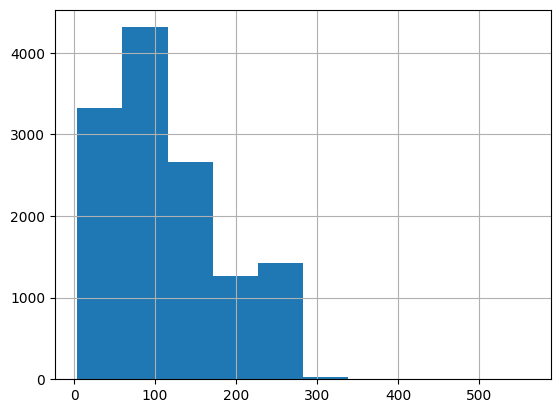

In [79]:
clr_text['num_karakter'].hist()

<Axes: >

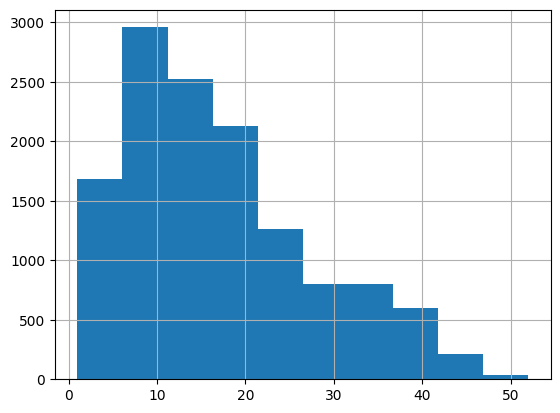

In [80]:
clr_text['num_kata'].hist()

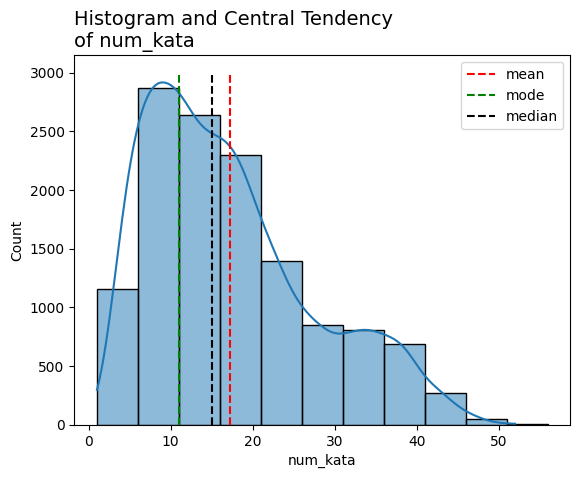

In [37]:
sns.histplot(data=clr_text, x='num_kata', binwidth=5, kde=True)
plt.vlines(clr_text['num_kata'].mean(), 0, 3000, label='mean', linestyles='dashed', color='red')
plt.vlines(clr_text['num_kata'].mode(), 0, 3000, label='mode', linestyles='dashed', color='green')
plt.vlines(clr_text['num_kata'].median(), 0, 3000, label='median', linestyles='dashed', color='black')
plt.title("Histogram and Central Tendency\nof num_kata", loc="left", fontsize=14)
plt.legend()
plt.show()

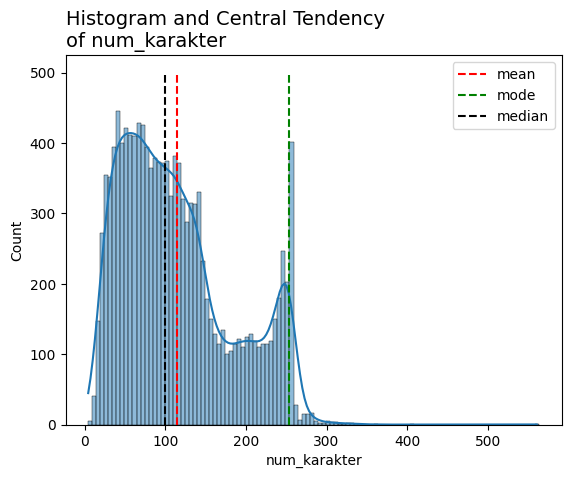

In [39]:
sns.histplot(data=clr_text, x='num_karakter', binwidth=5, kde=True)
plt.vlines(clr_text['num_karakter'].mean(), 0, 500, label='mean', linestyles='dashed', color='red')
plt.vlines(clr_text['num_karakter'].mode(), 0, 500, label='mode', linestyles='dashed', color='green')
plt.vlines(clr_text['num_karakter'].median(), 0, 500, label='median', linestyles='dashed', color='black')
plt.title("Histogram and Central Tendency\nof num_karakter", loc="left", fontsize=14)
plt.legend()
plt.show()

In [40]:
!pip3 install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\susic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='num_kata', ylabel='num_karakter'>

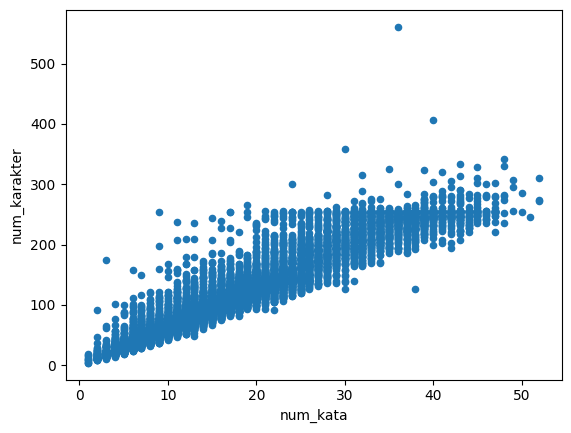

In [54]:
clr_text.plot(x='num_kata', y='num_karakter', kind = 'scatter')

In [55]:
p0 = clr_text['num_karakter'].min()
p0

4

In [56]:
p100 = clr_text['num_karakter'].max()
p100

561

In [57]:
q1 = clr_text['num_karakter'].quantile(0.25)
q1

59.0

In [58]:
q2 = clr_text['num_karakter'].quantile(0.5)
q2

100.0

In [59]:
q3 = clr_text['num_karakter'].quantile(0.75)
q3

152.0

In [60]:
iqr = q3-q1

In [61]:
# cari batas bawah
lower_limit = q1-1.5*iqr
print("Batas Bawah 'total_char: ", lower_limit)
print("nilai minimum", p0)

Batas Bawah 'total_char:  -80.5
nilai minimum 4


In [62]:
#cari batas atas
upper_limit = q3-1.5*iqr
print("Batas atas 'total_char: ", upper_limit)
print("nilai maksimum", p100)

Batas atas 'total_char:  12.5
nilai maksimum 561


In [63]:
if lower_limit < p0:
    print("Tidak ada outlier dari sisi batas bawah")
else : 
    print("ada outlier dari sisi batas bawah")

Tidak ada outlier dari sisi batas bawah


In [64]:
if lower_limit > p100:
    print("Tidak ada outlier dari sisi batas atas")
else : 
    print("ada outlier dari sisi batas atas")

ada outlier dari sisi batas atas


In [95]:
range_total_char = p100-p0
range_total_char

557